In [0]:

#indicamos que se usara la version 2 de Tensorflow y se importa
%tensorflow_version 2.x
import tensorflow as tf
#importamos el set de datos desde la libreria de Keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import datetime
from tensorflow.keras.callbacks import TensorBoard

import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#librerias de ayuda para el manejo de numeros e imagenes
import numpy as np
import PIL.Image as Image
import matplotlib.pylab as plt

In [0]:
ls

drive/  logs/  sample_data/


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train_dir=os.path.join('drive/My Drive/data/','train')
test_dir=os.path.join('drive/My Drive/data/','test')


train_NO_dir=os.path.join(train_dir,'No Finding')
train_IN_dir=os.path.join(train_dir,'Infiltration')

CLASS_NAMES=['Infiltration','No Finding']


train_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)
train_data_gen = train_image_generator.flow_from_directory(batch_size=35,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(128,128),
                                                           class_mode='binary')

test_data_gen = test_image_generator.flow_from_directory(batch_size=35,
                                                              directory=test_dir,
                                                              target_size=(128,128),
                                                              class_mode='binary')


training_batch, labels_batch = next(train_data_gen)
training_batch=tf.squeeze(tf.image.rgb_to_grayscale(training_batch))

test_batch, test_labels_batch = next(test_data_gen)
test_batch=tf.squeeze(tf.image.rgb_to_grayscale(test_batch))


training_batch.shape, labels_batch.shape

#print(training_batch)



Found 71 images belonging to 2 classes.
Found 96 images belonging to 2 classes.


(TensorShape([35, 128, 128]), (35,))

In [0]:
print(labels_batch)

[0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0.
 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0.]


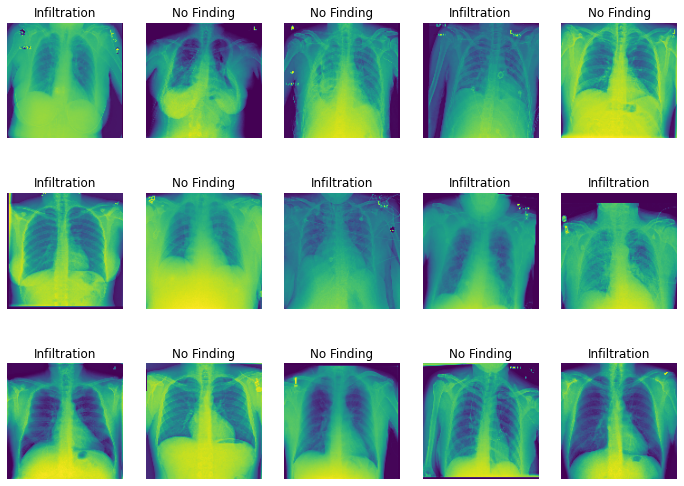

In [0]:
def plot_images(img_batch, labels=None):
  range_count = 15 if len(img_batch) > 15 else len(img_batch)
  plt.figure(figsize=(12,12))
  for i in range(range_count):
    plt.subplot(4,5,i+1) 
    plt.imshow(img_batch[i])
    if (labels is not None):
      plt.title(CLASS_NAMES[np.int(labels[i])]) 
    plt.axis('off')

plot_images(training_batch, labels_batch)

In [0]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

import datetime, os

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import TensorBoard
# checkpoint
dataset_path="/content/drive/My Drive/data"
filepath = dataset_path + "output.best.h5"
checkpoint_callback = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min',save_freq='epoch')

# tensorboard
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard(logdir, histogram_freq=1,profile_batch=0)

# callbacks
callbacks_list = [checkpoint_callback,tensorboard_callback]

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [0]:
model=Sequential([
    Flatten(input_shape=(128,128)),
    Dense(1024, activation='relu'),
    Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(training_batch, labels_batch,epochs=10,validation_split=0.3,callbacks=callbacks_list)

Epoch 1/10
1/1 [==============================] - ETA: 0s - loss: 0.8431 - accuracy: 0.5417
Epoch 00001: loss improved from inf to 0.84313, saving model to /content/drive/My Drive/dataoutput.best.h5
1/1 [==============================] - 3s 3s/step - loss: 0.8431 - accuracy: 0.5417 - val_loss: 33.2307 - val_accuracy: 0.6364
Epoch 2/10
1/1 [==============================] - ETA: 0s - loss: 51.3725 - accuracy: 0.4583
Epoch 00002: loss did not improve from 0.84313
1/1 [==============================] - 1s 1s/step - loss: 51.3725 - accuracy: 0.4583 - val_loss: 13.0110 - val_accuracy: 0.6364
Epoch 3/10
1/1 [==============================] - ETA: 0s - loss: 20.0222 - accuracy: 0.4583
Epoch 00003: loss did not improve from 0.84313
1/1 [==============================] - 1s 1s/step - loss: 20.0222 - accuracy: 0.4583 - val_loss: 14.7160 - val_accuracy: 0.3636
Epoch 4/10
1/1 [==============================] - ETA: 0s - loss: 11.1578 - accuracy: 0.5417
Epoch 00004: loss did not improve from 0.8431

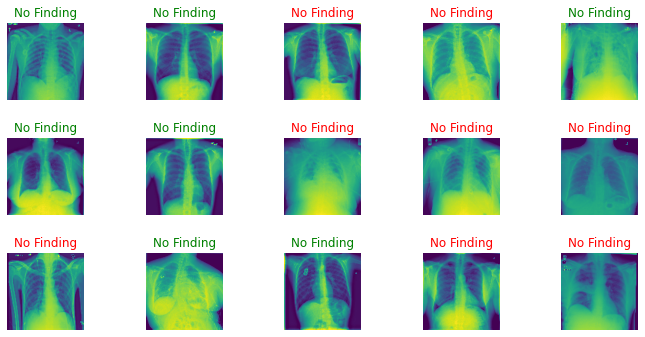

In [0]:
def plot_images(img_batch, labels, predicted_labels):
  plt.figure(figsize=(12,12))
  plt.subplots_adjust(hspace=0.5)
  for i in range(15):
    plt.subplot(6,5,i+1) 
    plt.imshow(img_batch[i])
    color = "green" if predicted_labels[i] == CLASS_NAMES[np.int(labels[i])] else "red"
    plt.title(predicted_labels[i], color=color)
    plt.axis('off')


predictions = model(test_batch)
predicted_class_names = np.array(CLASS_NAMES)[np.rint(predictions).astype('int32')].flatten()
plot_images(test_batch, test_labels_batch, predicted_class_names)

              precision    recall  f1-score   support

Infiltration       0.00      0.00      0.00        18
  No Finding       0.49      1.00      0.65        17

    accuracy                           0.49        35
   macro avg       0.24      0.50      0.33        35
weighted avg       0.24      0.49      0.32        35



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


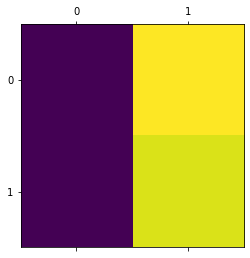

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
plt.matshow(confusion_matrix(test_labels_batch, predictions>0.5))

print(classification_report(test_labels_batch, predictions>0.5, target_names = ['Infiltration', 'No Finding']))

